In [ ]:
import zipfile
import os
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import shutil, sys 
import os
import cv2
from matplotlib import pyplot as plt
import PIL.Image
from IPython.display import Image
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms,datasets
import time
from tqdm import tqdm
import random
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/523_DeepLearning/FinalProject/Data/'

In [ ]:
dataList = pd.read_csv(filepath+'driver_imgs_list.csv') 

In [ ]:
dataList

subject classname            img
0        p002        c0  img_44733.jpg
1        p002        c0  img_72999.jpg
2        p002        c0  img_25094.jpg
3        p002        c0  img_69092.jpg
4        p002        c0  img_92629.jpg
...       ...       ...            ...
22419    p081        c9  img_56936.jpg
22420    p081        c9  img_46218.jpg
22421    p081        c9  img_25946.jpg
22422    p081        c9  img_67850.jpg
22423    p081        c9   img_9684.jpg

[22424 rows x 3 columns]

In [ ]:
#!unzip /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/imgs.zip

In [ ]:
sour_loc = filepath+"train.zip"
#dest_loc = filepath+"OriginalData"

In [ ]:
#!unzip "$sour_loc" -d "$dest_loc"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_17718.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_6731.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_83623.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_41576.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_13230.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_42719.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_49658.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/OriginalData/train/c4/img_84158.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/Origina

In [ ]:
#print('Number of images in training set = ',str(len(glob(filepath+'OriginalData/train/*/*.jpg'))))


Number of images in training set =  22424


In [ ]:
!unzip "$sour_loc" -d "$filepath"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_17718.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_6731.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_83623.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_41576.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_13230.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_42719.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_49658.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_84158.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_18417.jpg  
  inflating: /content/drive/MyDrive/523_DeepLearning/FinalProject/Data/train/c4/img_13

In [ ]:
#os.rename(filepath+"train",filepath+"TrainData")

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'train/*/*'))))

Number of images in training set =  22424


In [ ]:
len(dataList[dataList['subject'].isin(['p026','p012'])]['img'].tolist())

2019

In [ ]:
filestotransfer = dataList[dataList['subject'].isin(['p012','p026'])]['img'].tolist()

sometimes action fails and manually creating the folder needs to be done and remount the drive by executing the second cell or will take 5-10min to reflect on drive

---



In [ ]:
if os.path.exists(filepath+'TestData') == False:
  os.mkdir(filepath+'TestData')

In [ ]:
test_loc = filepath+"TestData/"

In [ ]:
for fname in filestotransfer:
    shutil.copy2(glob(filepath+"train/*/"+fname)[0], "$test_loc")

In [ ]:
for fname in filestotransfer:
    os.remove(glob(filepath+"train/*/"+fname)[0])

In [ ]:
print('Number of images in training set = ',str(len(glob(filepath+'train/*/*.jpg'))))
print('Number of images in testing set = ',str(len(glob(filepath+'TestData/*.jpg'))))


Number of images in training set =  20405
Number of images in testing set =  2019


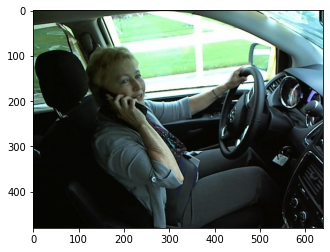

In [ ]:
img = cv2.imread(filepath+"train/c2/img_258.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
classes = [c for c in os.listdir(filepath+"train") if not c.startswith(".")]
classes.sort()
print(classes)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [ ]:
class_dict = {0 : "safe driving",
              1 : "texting - right",
              2 : "talking on the phone - right",
              3 : "texting - left",
              4 : "talking on the phone - left",
              5 : "operating the radio",
              6 : "drinking",
              7 : "reaching behind",
              8 : "hair and makeup",
              9 : "talking to passenger"}

Total number of training data : 20405


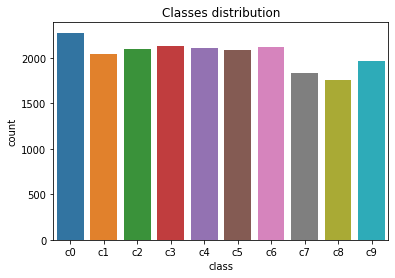

In [ ]:
df_train = dataList[(dataList['subject'] != 'p012') & (dataList['subject'] != 'p026')]
print("Total number of training data :",len(df_train))
class_count  = df_train.groupby('classname').size()
#plt.figure(figsize=(10,5))
sns.barplot(class_count.index, class_count.values)
plt.title('Classes Distribution')
plt.ylabel('Number of Occurrences')
plt.xlabel('Classes')
plt.show()
print("Total number of training data :",len(df_train))

# Test data - adding them to respective classes

In [ ]:
testimgnames = [f for f in os.listdir(filepath+"TestData/") if os.path.isfile(os.path.join(filepath+"TestData/", f))]

In [ ]:
len(testimgnames)

2019

In [ ]:
for filename in testimgnames:
  shutil.copy2(glob(filepath+"TestData/"+filename)[0], filepath+"TestData/"+dataList[dataList['img'] == filename]["classname"].iloc[0])

In [ ]:
for fname in testimgnames:
    os.remove(glob(filepath+"TestData/"+fname)[0])

In [ ]:
str(len(glob(filepath+'TestData/*.jpg')))

'0'

In [ ]:
str(len(glob(filepath+'TestData/*/*.jpg')))

'2019'

Total number of test data : 2019


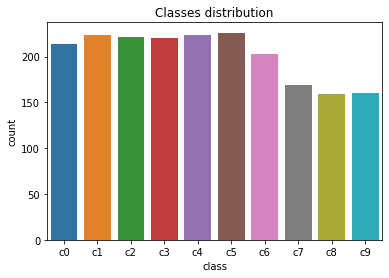

In [ ]:
df_test = dataList[dataList['subject'].isin(['p012','p026'])]
print("Total number of training data :",len(df_test))
class_count  = df_test.groupby('classname').size()
#plt.figure(figsize=(10,5))
sns.barplot(class_count.index, class_count.values)
plt.title('Classes Distribution')
plt.ylabel('Number of Occurrences')
plt.xlabel('Classes')
plt.show()
print("Total number of test data :",len(df_test))